# Step 1: Import Libraries

In [1]:
import numpy as np 
import pandas as pd
import os

In [2]:
import time
import copy
import numpy as np
import pandas as pd

In [3]:
import chainer
import chainer.functions as F
import chainer.links as L

TA-Lib Python wrapper for TA-Lib (http://ta-lib.org/).

https://mrjbq7.github.io/ta-lib/func_groups/momentum_indicators.html

In [4]:
import talib as ta

In [5]:
from plotly import tools
from plotly.graph_objs import *
from plotly.offline import init_notebook_mode, iplot, iplot_mpl

import matplotlib.pyplot as plt

In [6]:
import warnings
warnings.filterwarnings("ignore")

# Step 2: Explore Dataset

In [7]:
#choose stock dataset to use
data = "goog.us.txt"

main_folder_dir = os.getcwd()
print (main_folder_dir)
stockdata_folder_dir = os.path.join(os.path.join(main_folder_dir, "Data"), "Stocks")
print (stockdata_folder_dir)
data_dir = os.path.join(stockdata_folder_dir, data)
print(data_dir)
print("")

data = pd.read_csv(data_dir)
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')
print(data.index.min(), data.index.max())
print(data.count())
print(data.head())

#choose dataset to compare RL performance
market = "voo.us.txt"
etfdata_folder_dir = os.path.join(os.path.join(main_folder_dir, "Data"), "ETFs")
print (etfdata_folder_dir)
market_dir = os.path.join(etfdata_folder_dir, market)
print(market_dir)
print("")

market = pd.read_csv(market_dir)
market['Date'] = pd.to_datetime(market['Date'])
market = market.set_index('Date')
print(market.index.min(), market.index.max())
print(market.count())
print(market.head())

C:\Users\onnwe\Desktop\ISA-PM-SLS-2021-01-09-IS02PT-GRP-StockTradingRL
C:\Users\onnwe\Desktop\ISA-PM-SLS-2021-01-09-IS02PT-GRP-StockTradingRL\Data\Stocks
C:\Users\onnwe\Desktop\ISA-PM-SLS-2021-01-09-IS02PT-GRP-StockTradingRL\Data\Stocks\goog.us.txt

2014-03-27 00:00:00 2017-11-10 00:00:00
Open       916
High       916
Low        916
Close      916
Volume     916
OpenInt    916
dtype: int64
              Open    High     Low   Close  Volume  OpenInt
Date                                                       
2014-03-27  568.00  568.00  552.92  558.46   13052        0
2014-03-28  561.20  566.43  558.67  559.99   41003        0
2014-03-31  566.89  567.00  556.93  556.97   10772        0
2014-04-01  558.71  568.45  558.71  567.16    7932        0
2014-04-02  599.99  604.83  562.19  567.00  146697        0
C:\Users\onnwe\Desktop\ISA-PM-SLS-2021-01-09-IS02PT-GRP-StockTradingRL\Data\ETFs
C:\Users\onnwe\Desktop\ISA-PM-SLS-2021-01-09-IS02PT-GRP-StockTradingRL\Data\ETFs\voo.us.txt

2010-09-14 00

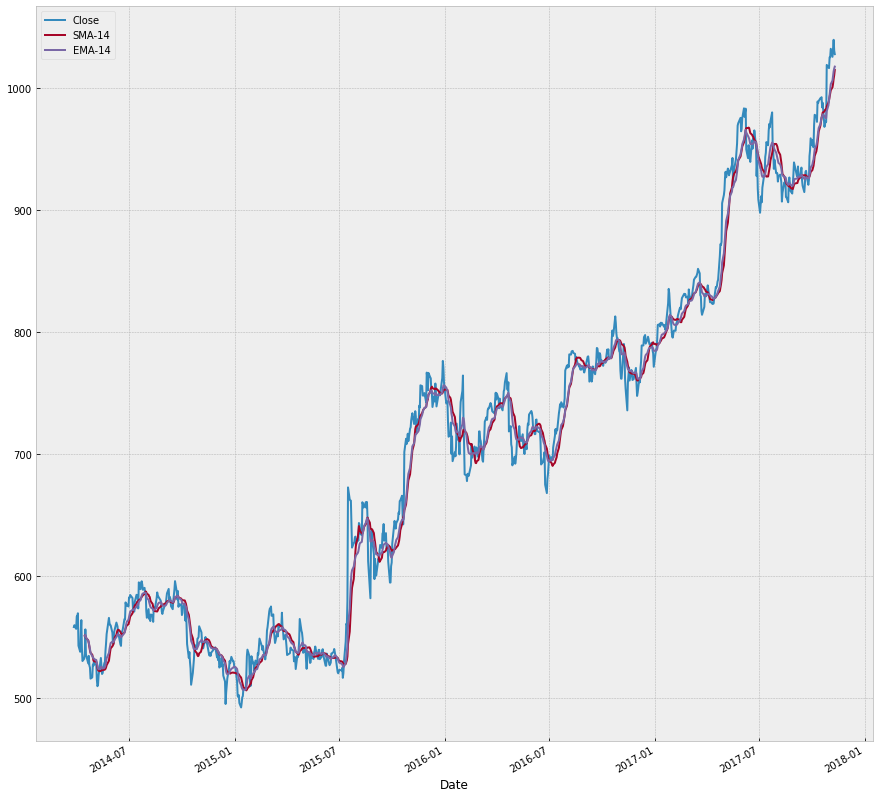

In [8]:
plt.style.use('bmh')

data['SMA-14'] = ta.SMA(data['Close'],14)
data['EMA-14'] = ta.EMA(data['Close'], timeperiod = 14)

# Plot
data[['Close','SMA-14','EMA-14']].plot(figsize=(15,15))
plt.show()

Bollinger Bands 
https://blog.quantinsti.com/bollinger-bands/

Bollinger band is used to analyse if stock it is overbought or oversold.

Bollinger Bands actually consist of three bands:

- 20-day moving average
- Upper Bollinger band - 2 standard deviations above
- Lower Bollinger band - 2 standard deviations below

Used for trading strategies:
- Reversal
- Band squeeze
- double top / bottoms
- Trading in the bands

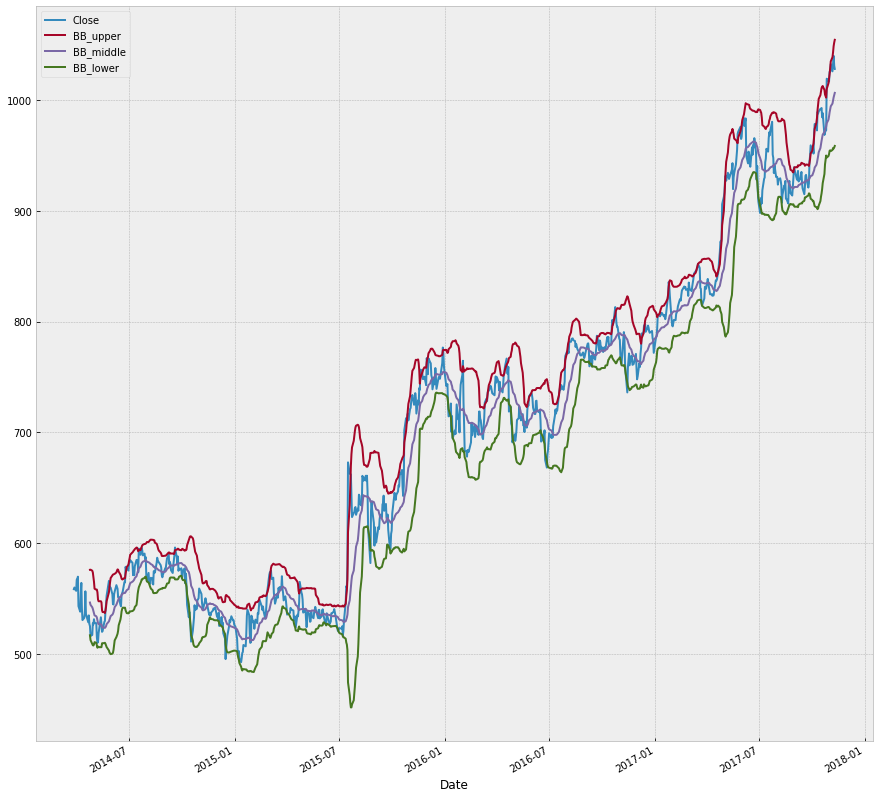

In [9]:
# Bollinger Bands
data['BB_upper'], data['BB_middle'], data['BB_lower'] = ta.BBANDS(data['Close'], timeperiod =20)
# Plot
data[['Close','BB_upper','BB_middle','BB_lower']].plot(figsize=(15,15))
plt.show()

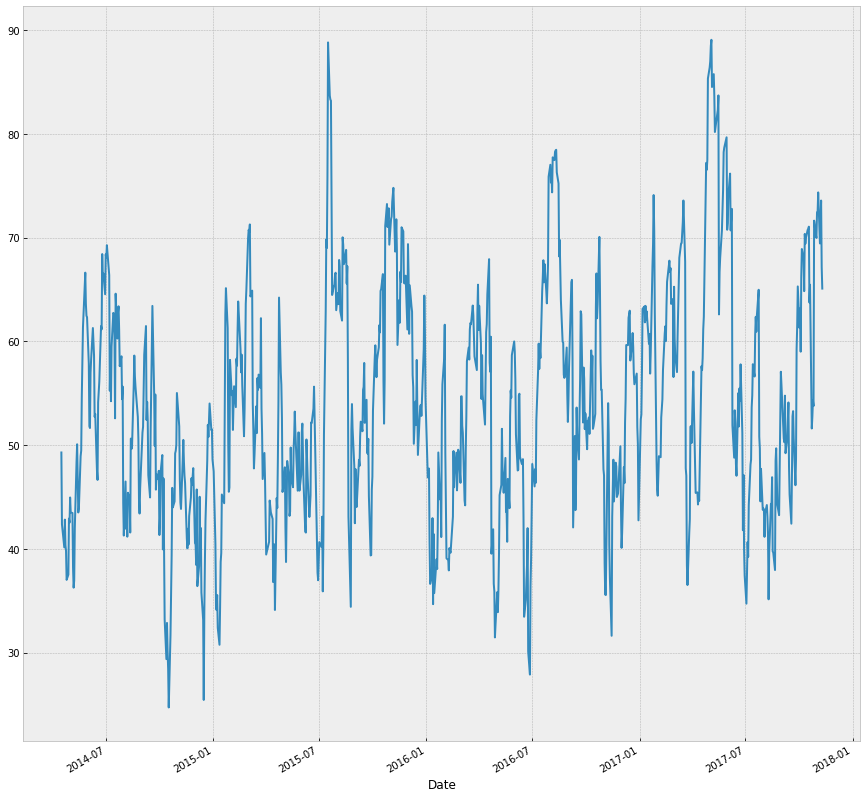

In [10]:
data['RSI'] = ta.RSI(data['Close'],14)
data['RSI'].plot(figsize=(15,15))
plt.show()

Stochastic Oscillator
https://blog.quantinsti.com/stochastic-oscillator/

Stochastic Oscillator is a momentum indicator which compares the recent closing price of an asset to a range of its prices over a specific period of time. 

It is an indicator which does not follow price or volume but signifies the speed, or momentum of a price. Helps to identify a bullish or bearish trend in the market.

The Stochastic oscillator indicator is used in the following manner:

Overbought and Oversold signals
Divergence indicator (Bulls and Bears)
Crossover strategy

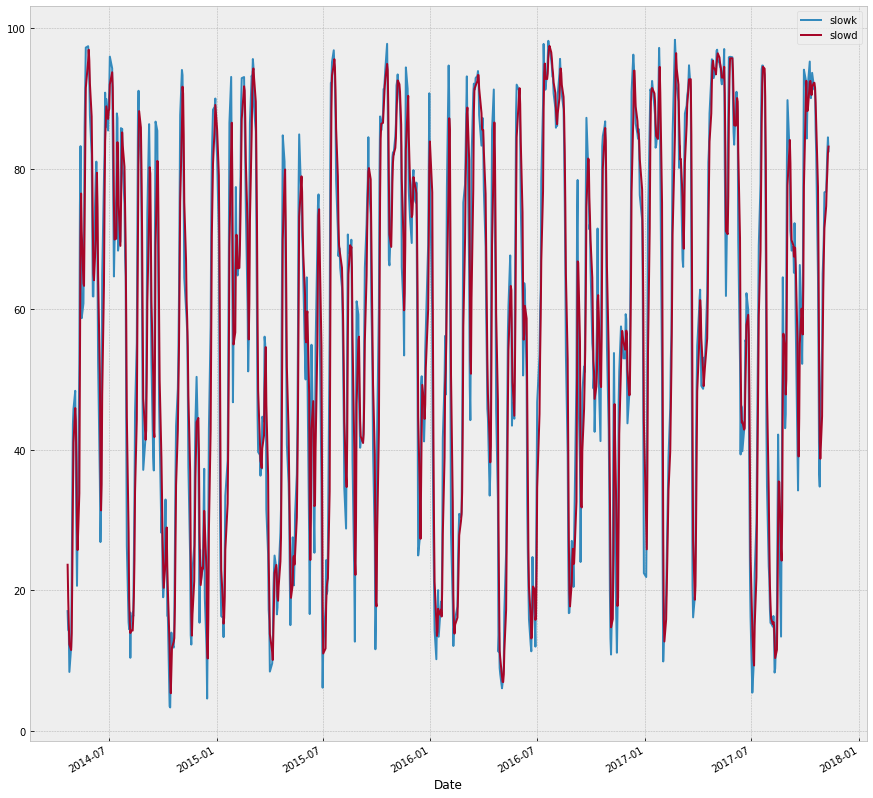

In [11]:
data['slowk'], data['slowd'] = ta.STOCH(data['High'], data['Low'], data['Close'], fastk_period=14, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
data[['slowk','slowd']].plot(figsize=(15,15))
plt.show()

What is a fast Stochastic oscillator? And what is a slow Stochastic oscillator?
The reason we use two lines is that we can use the crossover of the two lines as a signal, more specifically, the %D line can be called the signal line.

To emphasize the importance of the %D line, the stochastic oscillator was modified into two types:

Fast Stochastic Oscillator, and
Slow Stochastic Oscillator

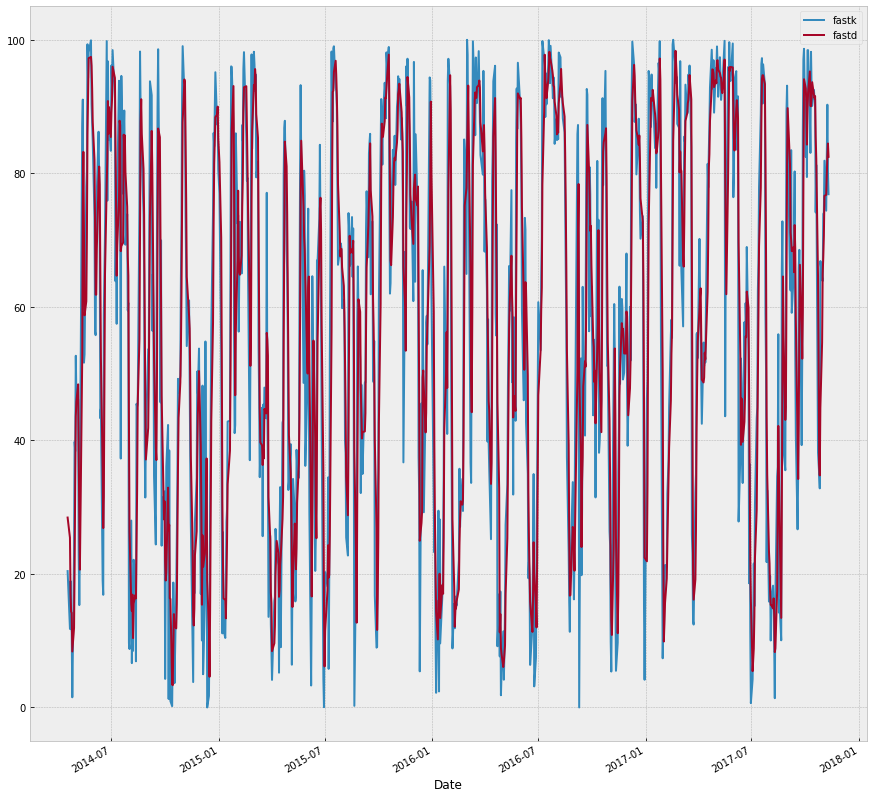

In [12]:
data['fastk'], data['fastd'] = ta.STOCHF(data['High'], data['Low'], data['Close'], fastk_period=14, fastd_period=3, fastd_matype=0)
data[['fastk','fastd']].plot(figsize=(15,15))
plt.show()

In [13]:
data.describe()

Open         High          Low        Close        Volume  \
count   916.000000   916.000000   916.000000   916.000000  9.160000e+02   
mean    702.895757   708.114831   697.058311   702.812259  1.725988e+06   
std     144.142510   144.697658   143.888208   144.496999  9.540722e+05   
min     494.650000   495.980000   487.560000   492.550000  7.932000e+03   
25%     560.525000   565.097500   555.627500   559.792500  1.173610e+06   
50%     710.780000   718.380000   703.450000   711.005000  1.511322e+06   
75%     793.825000   798.057500   787.887750   794.257500  1.988164e+06   
max    1033.990000  1048.390000  1028.450000  1039.850000  1.116490e+07   

       OpenInt       SMA-14       EMA-14     BB_upper    BB_middle  \
count    916.0   903.000000   903.000000   897.000000   897.000000   
mean       0.0   701.525454   701.634045   729.682251   701.054460   
std        0.0   141.648913   141.471531   144.137476   140.533566   
min        0.0   506.528571   507.036802   536.946353   512.012000   
25%        0.0   556.667143   555.816546   581.506256   556.720500   
50%        0.0   711.674286   712.946076   747.206693   711.952000   
75%        0.0   790.365357   787.371430   813.734024   787.744500   
max        0.0  1015.086429  1017.865629  1054.364401  1006.465000   

         BB_lower         RSI       slowk       slowd       fastk       fastd  
count  897.000000  902.000000  899.000000  899.000000  901.000000  901.000000  
mean   672.426669   53.997804   57.854112   57.791033   57.831730   57.785478  
std    138.762674   11.388402   27.001472   26.049248   29.203824   27.010815  
min    451.724236   24.708832    3.326388    5.350990    0.000000    3.326388  
25%    532.203221   45.648342   34.993324   35.805223   34.224430   34.882230  
50%    677.577698   52.736557   59.865795   59.563281   60.419849   59.716599  
75%    766.228839   61.824534   83.165229   81.385981   85.074169   83.119102  
max    958.565599   89.070171   98.351978   97.495037  100.000000   98.351978

In [14]:
date_split = '2016-01-01'
train = data[:date_split]
test = data[date_split:]
print(len(train), len(test))

market_extra = market[:date_split]
market_compare = market[date_split:]
print(len(market_extra), len(market_compare))

446 470
1334 470


In [15]:
def plot_train_test(train, test, date_split):
    
    data = [
        Candlestick(x=train.index, open=train['Open'], high=train['High'], low=train['Low'], close=train['Close'], \
                    name='train'),
        Candlestick(x=test.index, open=test['Open'], high=test['High'], low=test['Low'], close=test['Close'], \
                    name='test')
    ]
    layout = {
         'shapes': [
             {'x0': date_split, 'x1': date_split, 'y0': 0, 'y1': 1, 'xref': 'x', 'yref': 'paper', \
              'line': {'color': 'rgb(0,0,0)', 'width': 1}}
         ],
        'annotations': [
            {'x': date_split, 'y': 1.0, 'xref': 'x', 'yref': 'paper', 'showarrow': False, 'xanchor': 'left', \
             'text': ' test data'},
            {'x': date_split, 'y': 1.0, 'xref': 'x', 'yref': 'paper', 'showarrow': False, 'xanchor': 'right', \
             'text': 'train data '}
        ]
    }
    figure = Figure(data=data, layout=layout)
    iplot(figure)
    

In [16]:
plot_train_test(train, test, date_split)

# Step 3: Set up Environment

In [17]:
act_dict = {0:"HOLD", 1:"BUY", 2:"SELL"}
tnx_cost = 0 # -0.01       # this is the cost for every tnx added to BUY leg (see below)
                        # - should we add it to buy step (does it discourage buying? )
                        # - or should we add it to sell leg (adjust profit - but how does it learn to trade less?)
funding_cost = 0 # -0.001   # this is the funding cost aded to every HOLD leg. 
clip_rewards = False # decide wether to use raw rewards ie profits or clipped to a boolean 1/-1
debug = False

In [18]:
class Environment1:
    
    def __init__(self, data, history_t=90): # history_t is currently only used to intiaze NN input layer size??
        self.data = data
        self.history_t = history_t
        self.reset()
        
    def reset(self):
        self.t = 0
        self.done = False    # used for ??
        self.profits = 0
        self.positions = []
        self.position_value = 0
        self.invested_capital = 0
        self.history = [0 for _ in range(self.history_t)]
        return [self.position_value] + self.history # obs
    
    def step(self, act):
        
        if debug: print(f"\n\nStep:{self.t} Action: {act_dict[act]}")
        
        self.t += 1   # increment step counter    
        step_reward = 0    # initialize reward for this step
        
        prev_price = self.data.iloc[(self.t-1), :]['Close'] # get price at step t-1
        curr_price = self.data.iloc[self.t, :]['Close']  # get curr price at step t
        
        # act = 0: stay, 1: buy, 2: sell
        if act_dict[act] == 'BUY':  # buy
            
            self.positions.append(curr_price) # BUY at curr closing price and add to position
            self.invested_capital += curr_price
            if debug: print(f"{act_dict[act]} @ {curr_price} New Position: {self.positions}")

            #### Add transaction costs #########
            step_reward = curr_price * tnx_cost  # adding tnx cost to discourage unecessary frequent buying  
            
        elif act_dict[act] == 'SELL': # sell

            if len(self.positions) == 0: 
                #reward = -1   # if no position then negative rewards
                step_reward = 0   # if no position then no reward, tnx cost nor funding cost
                if debug: print(f"Action:{act_dict[act]} No open position. Reward:{step_reward}")
            
            else:
                step_profits = 0
                
                for trade_price in self.positions:
                    trade_profit = (curr_price - trade_price) # calculate cumulative profit for each 'buy'
                    step_profits += trade_profit
                    if debug: print(f"{act_dict[act]} @ {curr_price} for purchase @ {trade_price}. Profit: {trade_profit}. Cumm step profit: {step_profits}")
                
                step_reward = step_profits  # reward should be the same as step profits
                self.profits += step_profits  # add step profits to cummulative portfolio profits
                if debug: print(f"Step Profit = Step Reward:{step_reward} Cummulative Strategy Profits:{self.profits}")
                
                self.positions = [] # flatten portfolio position to zero
                self.invested_capital = 0 # reset investmented amount
                
        elif act_dict[act] == 'HOLD':  # hold
            self.position_value = 0  # initialize
            
            # what is this postion_value ie MTM used for? Note, Profit is calculated on SELL wrt TradePrice
            for trade_price in self.positions:
                self.position_value += (curr_price - trade_price) # MTM for curr position (prev step BUY/HOLD as SELL flattens position. 
            
            ### Funding cost
            step_reward = self.invested_capital * funding_cost ### only if there is an open position value
            if debug: print(f"{act_dict[act]} Curr Position:{self.positions} InvestedCap:{self.invested_capital} MTM:{self.position_value} Reward:{step_reward}")
            
        else: 
            print(f"Invalid Action:{act}:{act_dict[act]}")
        
               
        # Generate the returns history to be used by DQN for training & prediction.
        self.history.pop(0) # remove first item in list
        self.history.append(curr_price - prev_price) # add diff = returns to list
               
        reward = step_reward
        # clipping reward   - should we reomve clipping & use raw rewards?? 
        if clip_rewards: 
            if   step_reward > 0: reward = 1
            elif step_reward < 0: reward = -1 
        
        if debug: print(f"Raw Reward:{step_reward}  Actual Reward:{reward}")  # this is the reward at current step 
        
        return [self.position_value] + self.history , reward, self.done # obs, reward, done

In [19]:
env = Environment1(train) # the data is stored inside the environment
env.reset()
simulate_action = ['BUY','BUY','BUY','HOLD','HOLD','BUY','SELL']
for n in range(len(simulate_action)):    
    action = list(act_dict.keys())[list(act_dict.values()).index(simulate_action[n])]  # select simulated action
    env.step(action)

# Step 4: Training of DQN

In [20]:
def train_dqn(env):

    class Q_Network(chainer.Chain):

        def __init__(self, input_size, hidden_size, output_size):
            super(Q_Network, self).__init__(
                fc1 = L.Linear(input_size, hidden_size),
                fc2 = L.Linear(hidden_size, hidden_size),
                fc3 = L.Linear(hidden_size, output_size)
            )

        def __call__(self, x):
            h = F.relu(self.fc1(x))
            h = F.relu(self.fc2(h))
            y = self.fc3(h)
            return y

        def reset(self):
            self.zerograds()

    Policy_Network = Q_Network(input_size=env.history_t+1, hidden_size=100, output_size=3)
    Target_Network = copy.deepcopy(Policy_Network)
    optimizer = chainer.optimizers.Adam()
    optimizer.setup(Policy_Network)

    epoch_num = 100
    step_max = len(env.data)-1
    memory_size = 200
    batch_size = 20
    epsilon = 1.0
    epsilon_decrease = 1e-3
    epsilon_min = 0.1
    start_reduce_epsilon = 200
    train_freq = 10
    update_q_freq = 20
    gamma = 0.97
    show_log_freq = 5

    memory = []
    total_step = 0
    total_rewards = []
    total_losses = []

    start = time.time()
    for epoch in range(epoch_num):

        state = env.reset()
        step = 0
        done = False
        total_reward = 0
        total_loss = 0

        while not done and step < step_max:
            
            # select action - epsilion greedy policy
            # Includes Hard Constraint: If there are no positions to sell, limit options to "Buy" or "Hold" only
            if len(env.positions) == 0:
                action = np.random.randint(2) # Initialize action to be random at first
            else:
                action = np.random.randint(3)
                
            if np.random.rand() > epsilon:
                action_value = Policy_Network(np.array(state, dtype=np.float32).reshape(1, -1))
                
                # if there are no positions to sell and highest action value is "Sell", choose second best action
                if len(env.positions) == 0 and np.argmax(action_value.data) == 2:
                    action_value.data[0][np.argmax(action_value.data)] = np.min(action_value.data)

                action = np.argmax(action_value.data)

            # act based on selected action
            next_state, reward, done = env.step(action)
            
            # fill up the history before starting the training
            if step < env.history_t - 1:
                step += 1
                continue

            # add memory
            memory.append((state, action, reward, next_state, done)) 
            if len(memory) > memory_size:
                memory.pop(0)

            # train or update q network
            if len(memory) == memory_size: 
                if total_step % train_freq == 0:
                    shuffled_memory = np.random.permutation(memory)
                    memory_idx = range(len(shuffled_memory))
                    for i in memory_idx[::batch_size]: 
                        batch = np.array(shuffled_memory[i:i+batch_size])
                        b_state = np.array(batch[:, 0].tolist(), dtype=np.float32).reshape(batch_size, -1)
                        b_action = np.array(batch[:, 1].tolist(), dtype=np.int32)
                        b_reward = np.array(batch[:, 2].tolist(), dtype=np.int32)
                        b_next_state = np.array(batch[:, 3].tolist(), dtype=np.float32).reshape(batch_size, -1)
                        b_done = np.array(batch[:, 4].tolist(), dtype=np.bool)

                        #Policy Network
                        action_value = Policy_Network(b_state)
                        
                        #Target Network
                        max_next_action_value = np.max(Target_Network(b_next_state).data, axis=1)
                        target_action_value = copy.deepcopy(action_value.data)
                        for j in range(batch_size):
                            target_action_value[j, b_action[j]] = b_reward[j]+gamma*max_next_action_value[j]*(not b_done[j]) 
                        
                        Policy_Network.reset()
                        loss = F.mean_squared_error(action_value, target_action_value) # here the difference in action values are compared. However, all actions values are included in the loss function as compared to reference code
                        total_loss += loss.data
                        loss.backward()
                        optimizer.update()

                if total_step % update_q_freq == 0:
                    Target_Network = copy.deepcopy(Policy_Network)

            # epsilon
            if epsilon > epsilon_min and total_step > start_reduce_epsilon:
                epsilon -= epsilon_decrease

            # next step
            total_reward += reward
            state = next_state
            step += 1
            total_step += 1

        total_rewards.append(total_reward)
        total_losses.append(total_loss)

        if (epoch+1) % show_log_freq == 0:
            log_reward = sum(total_rewards[((epoch+1)-show_log_freq):])/show_log_freq
            log_loss = sum(total_losses[((epoch+1)-show_log_freq):])/show_log_freq
            elapsed_time = time.time()-start
            print('\t'.join(map(str, [epoch+1, epsilon, total_step, log_reward, log_loss, elapsed_time])))
            start = time.time()
            
    return Policy_Network, total_losses, total_rewards
    

In [21]:
Policy_Network, total_losses, total_rewards = train_dqn(Environment1(train))

5	0.0999999999999992	1780	358.9879999999997	96687.9822898388	7.569792985916138
10	0.0999999999999992	3560	824.2919999999988	8547619.527813721	8.422651290893555
15	0.0999999999999992	5340	1568.5639999999996	2870055.1542785643	8.15409255027771
20	0.0999999999999992	7120	1373.803999999999	577101.1125076294	8.074430227279663
25	0.0999999999999992	8900	469.4020000000003	1015925.7317764282	8.016557455062866
30	0.0999999999999992	10680	897.6040000000006	2923007.9592193603	7.3984763622283936
35	0.0999999999999992	12460	469.3039999999999	205428.4706501007	7.210058927536011
40	0.0999999999999992	14240	918.8740000000009	2494582.3085372923	7.159611463546753
45	0.0999999999999992	16020	464.32600000000105	130999.76815719604	7.110659837722778
50	0.0999999999999992	17800	2214.5739999999996	3614091.965065765	7.143014192581177
55	0.0999999999999992	19580	2785.013999999999	16668557.120654296	7.221667289733887
60	0.0999999999999992	21360	2292.2040000000006	13049265.778710937	7.199436187744141
65	0.0999999

In [22]:
def plot_loss_reward(total_losses, total_rewards):

    figure = tools.make_subplots(rows=1, cols=2, subplot_titles=('loss', 'reward'), print_grid=False)
    figure.append_trace(Scatter(y=total_losses, mode='lines', line=dict(color='skyblue')), 1, 1)
    figure.append_trace(Scatter(y=total_rewards, mode='lines', line=dict(color='orange')), 1, 2)
    figure['layout']['xaxis1'].update(title='epoch')
    figure['layout']['xaxis2'].update(title='epoch')
    figure['layout'].update(height=400, width=900, showlegend=False)
    iplot(figure)
    

In [23]:
plot_loss_reward(total_losses, total_rewards)

# Step 5: Training Evaluation

In [24]:
def train_test_by_q(train_env, test_env, Policy_Network, algorithm_name):
    
    # train
    state = train_env.reset()
    train_actions = []
    train_rewards = []
    train_invested_capital = []
    train_position_value = []
    train_profits = []

    for _ in range(len(train_env.data)-1):
        
        action_value = Policy_Network(np.array(state, dtype=np.float32).reshape(1, -1))
        
        # if there are no positions to sell and highest action value is "Sell", choose second best action
        if len(train_env.positions) == 0 and np.argmax(action_value.data) == 2:
            action_value.data[0][np.argmax(action_value.data)] = np.min(action_value.data)
        
        action = np.argmax(action_value.data)
        next_state, reward, done = train_env.step(action)
        
        train_actions.append(action)
        train_rewards.append(reward)
        train_invested_capital.append(train_env.invested_capital)
        train_position_value.append(train_env.position_value)
        train_profits.append(train_env.profits)
        
        state = next_state
    
    # test
    state = test_env.reset()
    test_actions = []
    test_rewards = []
    test_invested_capital = []
    test_position_value = []
    test_profits = []

    for _ in range(len(test_env.data)-1):
    
        action_value = Policy_Network(np.array(state, dtype=np.float32).reshape(1, -1))
            
        # if there are no positions to sell and highest action value is "Sell", choose second best action
        if len(test_env.positions) == 0 and np.argmax(action_value.data) == 2:
            action_value.data[0][np.argmax(action_value.data)] = np.min(action_value.data)

        action = np.argmax(action_value.data)
        next_state, reward, done = test_env.step(action)
        
        test_actions.append(action)
        test_rewards.append(reward)
        test_invested_capital.append(test_env.invested_capital)
        test_position_value.append(test_env.position_value)
        test_profits.append(test_env.profits)

        state = next_state

    return train_env, test_env, algorithm_name, \
           train_actions, train_rewards, train_invested_capital, train_position_value, train_profits, \
           test_actions, test_rewards, test_invested_capital, test_position_value, test_profits

In [25]:
train_env, test_env, algorithm_name, \
train_actions, train_rewards, train_invested_capital, train_position_value, train_profits, \
test_actions, test_rewards, test_invested_capital, test_position_value, test_profits \
= train_test_by_q(Environment1(train), Environment1(test), Policy_Network, 'DQN')

In [26]:
# Capital Asset Pricing Model
# expected_returns = risk_free_rate + beta(market_returns - risk_free_rate)

#Insert Beta of your stock choice
#https://sg.finance.yahoo.com/quote/GOOG/key-statistics?p=GOOG
beta = 1.02

# Insert risk_free_rate
# Estimated by US 10 years Treasury Rate
# https://www.macrotrends.net/2016/10-year-treasury-bond-rate-yield-chart
risk_free_rate = (1.0184 + 1.0233)/2 # yearly returns
d_risk_free_rate = risk_free_rate**(1/252) #number of days US market is open

test_index = test.reset_index()
evaluation = test.copy()

market_returns = {}
market_compare_index = market_compare.reset_index()
for i in range(len((market_compare_index))-1):
    market_returns[market_compare_index.iloc[i]["Date"]] = ((market_compare_index.iloc[i+1]["Close"] - market_compare_index.iloc[i]["Close"]) / market_compare_index.iloc[i]["Close"]) + 1
evaluation["market_returns"] = pd.Series(market_returns)

expected_returns = {}
for i in range(len((evaluation))-1):
    expected_returns[test_index.iloc[i]["Date"]] = d_risk_free_rate + beta * (evaluation.iloc[i+1]["market_returns"]  - d_risk_free_rate)
evaluation["expected_returns"] = pd.Series(market_returns)    

evaluation = evaluation[["market_returns", "expected_returns"]]
evaluation["risk_free_rate"] = d_risk_free_rate
evaluation["invested_capital"] = test_invested_capital + [np.nan]
average_portfolio_value = evaluation["invested_capital"].mean()

evaluation["position_value"] = test_position_value + [np.nan]
drawdown = evaluation["position_value"].min()

evaluation["cumulative_profits"] = test_profits + [np.nan]

cumulative_risk_free_returns = {}
returns = 0
for i in range(len((evaluation))-1):
    returns = returns + (evaluation.iloc[i]["invested_capital"] * evaluation.iloc[i]["risk_free_rate"]) - evaluation.iloc[i]["invested_capital"]
    cumulative_risk_free_returns[test_index.iloc[i]["Date"]] = returns
evaluation["cumulative_risk_free_returns"] = pd.Series(cumulative_risk_free_returns)

cumulative_SP_returns = {}
returns = 0
for i in range(len((evaluation))-1):
    returns = returns + (evaluation.iloc[i]["invested_capital"] * evaluation.iloc[i]["market_returns"]) - evaluation.iloc[i]["invested_capital"]
    cumulative_SP_returns[test_index.iloc[i]["Date"]] = returns
evaluation["cumulative_SP_returns"] = pd.Series(cumulative_SP_returns)

cumulative_stock_expected_returns = {}
returns = 0
for i in range(len((evaluation))-1):
    returns = returns + (evaluation.iloc[i]["invested_capital"] * evaluation.iloc[i]["expected_returns"]) - evaluation.iloc[i]["invested_capital"]
    cumulative_stock_expected_returns[test_index.iloc[i]["Date"]] = returns
evaluation["cumulative_stock_expected_returns"] = pd.Series(cumulative_stock_expected_returns)


# cumulative_risk_free_returns = {}
# portfolio_value = average_portfolio_value
# for i in range(len((evaluation))-1):
#     portfolio_value = portfolio_value * evaluation.iloc[i]["risk_free_rate"]
#     cumulative_risk_free_returns[test_index.iloc[i]["Date"]] = portfolio_value - average_portfolio_value
# evaluation["cumulative_risk_free_returns"] = pd.Series(cumulative_risk_free_returns)

# cumulative_SP_returns = {}
# portfolio_value = average_portfolio_value
# for i in range(len((evaluation))-1):
#     portfolio_value = portfolio_value * evaluation.iloc[i]["market_returns"]
#     cumulative_SP_returns[test_index.iloc[i]["Date"]] = portfolio_value - average_portfolio_value
# evaluation["cumulative_SP_returns"] = pd.Series(cumulative_SP_returns)

# cumulative_stock_expected_returns = {}
# portfolio_value = average_portfolio_value
# for i in range(len((evaluation))-1):
#     portfolio_value = portfolio_value * evaluation.iloc[i]["expected_returns"]
#     cumulative_stock_expected_returns[test_index.iloc[i]["Date"]] = portfolio_value - average_portfolio_value
# evaluation["cumulative_stock_expected_returns"] = pd.Series(cumulative_stock_expected_returns)


print(evaluation.head(20))

            market_returns  expected_returns  risk_free_rate  \
Date                                                           
2016-01-04        1.001742          1.001742        1.000082   
2016-01-05        0.987376          0.987376        1.000082   
2016-01-06        0.975622          0.975622        1.000082   
2016-01-07        0.989399          0.989399        1.000082   
2016-01-08        1.000118          1.000118        1.000082   
2016-01-11        1.008241          1.008241        1.000082   
2016-01-12        0.975597          0.975597        1.000082   
2016-01-13        1.016217          1.016217        1.000082   
2016-01-14        0.978683          0.978683        1.000082   
2016-01-15        1.000963          1.000963        1.000082   
2016-01-19        0.988278          0.988278        1.000082   
2016-01-20        1.004866          1.004866        1.000082   
2016-01-21        1.020519          1.020519        1.000082   
2016-01-22        0.984757          0.98

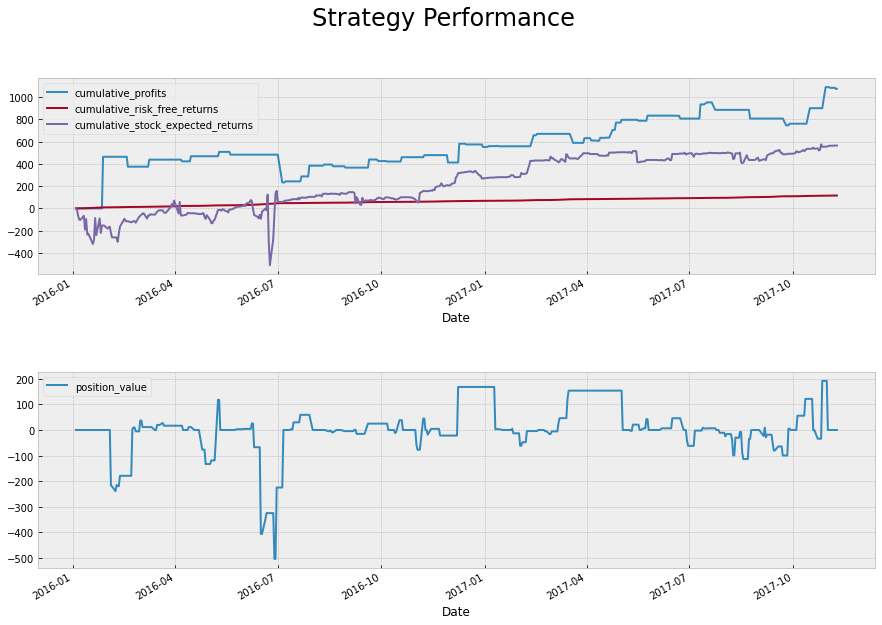

Average Portfolio Size: 3009.7749083155645, Maximum drawdown = -503.60999999999956


In [47]:
fig, (ax1, ax2) = plt.subplots(2)

evaluation[['cumulative_profits','cumulative_risk_free_returns', 'cumulative_stock_expected_returns']].plot(figsize=(15,10), ax = ax1)
evaluation[['position_value']].plot(figsize=(15,10), ax = ax2)

fig.suptitle("Strategy Performance",fontsize=24)
fig.subplots_adjust(hspace = 0.5)
plt.show()

print(f"Average Portfolio Size: {average_portfolio_value}, Maximum drawdown = {drawdown}")

In [28]:
# plot
train_copy = train_env.data.copy()
test_copy = test_env.data.copy()
train_copy['action'] = train_actions + [np.nan]
train_copy['reward'] = train_rewards + [np.nan]
test_copy['action'] = test_actions + [np.nan]
test_copy['reward'] = test_rewards + [np.nan]
train0 = train_copy[train_copy['action'] == 0]
train1 = train_copy[train_copy['action'] == 1]
train2 = train_copy[train_copy['action'] == 2]
test0 = test_copy[test_copy['action'] == 0]
test1 = test_copy[test_copy['action'] == 1]
test2 = test_copy[test_copy['action'] == 2]
act_color0, act_color1, act_color2 = 'gray', 'cyan', 'magenta'

data = [
    Candlestick(x=train0.index, open=train0['Open'], high=train0['High'], low=train0['Low'], close=train0['Close'], \
                increasing=dict(line=dict(color=act_color0)), decreasing=dict(line=dict(color=act_color0))),
    Candlestick(x=train1.index, open=train1['Open'], high=train1['High'], low=train1['Low'], close=train1['Close'], \
                increasing=dict(line=dict(color=act_color1)), decreasing=dict(line=dict(color=act_color1))),
    Candlestick(x=train2.index, open=train2['Open'], high=train2['High'], low=train2['Low'], close=train2['Close'], \
                increasing=dict(line=dict(color=act_color2)), decreasing=dict(line=dict(color=act_color2))),

    Candlestick(x=test0.index, open=test0['Open'], high=test0['High'], low=test0['Low'], close=test0['Close'], \
                increasing=dict(line=dict(color=act_color0)), decreasing=dict(line=dict(color=act_color0))),
    Candlestick(x=test1.index, open=test1['Open'], high=test1['High'], low=test1['Low'], close=test1['Close'], \
                increasing=dict(line=dict(color=act_color1)), decreasing=dict(line=dict(color=act_color1))),
    Candlestick(x=test2.index, open=test2['Open'], high=test2['High'], low=test2['Low'], close=test2['Close'], \
                increasing=dict(line=dict(color=act_color2)), decreasing=dict(line=dict(color=act_color2)))
]
title = '{}: train s-reward {}, profits {}, test s-reward {}, profits {}'.format(
    algorithm_name,
    int(sum(train_rewards)),
    int(train_profits[-1]),
    int(sum(test_rewards)),
    int(test_profits[-1])
)
layout = {
    'title': title,
    'showlegend': False,
     'shapes': [
         {'x0': date_split, 'x1': date_split, 'y0': 0, 'y1': 1, 'xref': 'x', 'yref': 'paper', 'line': {'color': 'rgb(0,0,0)', 'width': 1}}
     ],
    'annotations': [
        {'x': date_split, 'y': 1.0, 'xref': 'x', 'yref': 'paper', 'showarrow': False, 'xanchor': 'left', 'text': ' test data'},
        {'x': date_split, 'y': 1.0, 'xref': 'x', 'yref': 'paper', 'showarrow': False, 'xanchor': 'right', 'text': 'train data '}
    ]
}
figure = Figure(data=data, layout=layout)
iplot(figure)

In [29]:
# The reinforced trading advisor
#
# Better Model
# 1. State should consist of data with past history of min t_history instead of 0,0,0,0 (Jie Shen)
# 2. More Actions
#    - Buying more than 1 stock at each time period
#    - Not selling all stocks at each time period
# 3. More states
#     - Moving averages (Nirav)
#     - Momentum (rate of change of price) (Nirav)
#     - Daily Volume (Nirav)
# 4. Using returns as part of the state? (Done)
#
# Better rewards to represent reality
# 1. Negative reward for drawdown? (cost of funding/opportunity cost) (holding cost) (Nirav)
# 2. Negative reward for Transaction cost? (Nirav)
# 3. Not clipping rewwards (Jie Shen)
# 4. Rewarding/not rewarding volatilty (Jie Shen/Nirav)
#
# Better Evaluation
# 1. Compare it against the market S&P * beta? (Wei Cheng) (sharpe-ratio, risk-adjusted returns)
# 2. Maximum loss (drawdown) (Wei Cheng)
# 3. Maximum profit (Wei Cheng)
# 4. Test it with another company within the same sector and outside the sector (Wei Cheng)
# 5. Improve on the graph (returns vs S&P returns)
## Sharpe Ratio
# sharpe_ratio = (portfolio_returns - risk_free_rate) / sd(portfolio_returns - risk_free_rate)
# Main Wrapper for CLI (Jie Shen/Wei Cheng)